# **맷플롯립을 활용한 기정정보 데이터 분석

In [2]:
# 한글 폰트 설치 및 적용
# fc-cache: succeeded 확인 후 [런타임 다시 시작] 할 것.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
# 판다스 관련 라이브러리 가져오기
import pandas as pd

# 데이터를 데이터프레임 형태로 가져오기
df = pd.read_csv('부산기온.csv', encoding='cp949')
df.head()   # 기본 위에서 5줄만 보여준다.

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,159,부산,2022-11-01,17.0,12.5,657.0,23.0,1217
1,159,부산,2022-11-02,16.7,12.3,554.0,23.1,1258
2,159,부산,2022-11-03,16.4,11.9,654.0,22.8,1348
3,159,부산,2022-11-04,11.6,7.5,2357.0,16.8,1519
4,159,부산,2022-11-05,10.6,5.5,537.0,17.4,1447


## 결측치 처리
데이터프레임의 개요를출력하여
결측치가 있는지 간단히 확인.

info()함수로 데이터프로임 df의 열별 개수와 자료형 출력

In [5]:
# 데이터 프레임 개요 확인
df.info()

# 최저기온,최저기온 시각이 364개로 1개 모자람.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       364 non-null    float64
 5   최저기온 시각(hhmi)  364 non-null    float64
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


데이터의 일부가 빠져 결측치가 있을 경우 데이터 하나를 그 이전행 값으로 채워 넣기.

결측치를 대체할 떄는 신중히 판단해야 한다.

결측의 원인과 특성을 고려하여 데이터의 분포를 왜곡하지 않도록 주의해야 한다.

In [8]:
# 결측치 채우기 - 이전의 행의 값과 같게 채움.
# df 원본 남기기
df2 = df.fillna(method='ffill')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   최저기온(°C)       365 non-null    float64
 5   최저기온 시각(hhmi)  365 non-null    float64
 6   최고기온(°C)       365 non-null    float64
 7   최고기온 시각(hhmi)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


## 그래프 생성.

기온 옆의 이름에는 특수문자가 있다.

사용하기 편하도록 rename() 함수를 사용하여 이름을 변경해서 사용하자.

In [11]:
df2. rename(columns = {'평균기온(°C)' : '평균기온'}, inplace = True)
df2. rename(columns = {'최고기온(°C)' : '최고기온'}, inplace = True)
df2. rename(columns = {'최저기온(°C)' : '최저기온'}, inplace = True)

df2.head(3)

,지점,지점명,일시,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi)
0,159,부산,2022-11-01,17.0,12.5,657.0,23.0,1217
1,159,부산,2022-11-02,16.7,12.3,554.0,23.1,1258
2,159,부산,2022-11-03,16.4,11.9,654.0,22.8,1348


##그래프(차트) 생성
<br>
x축  : 1 ~ 365


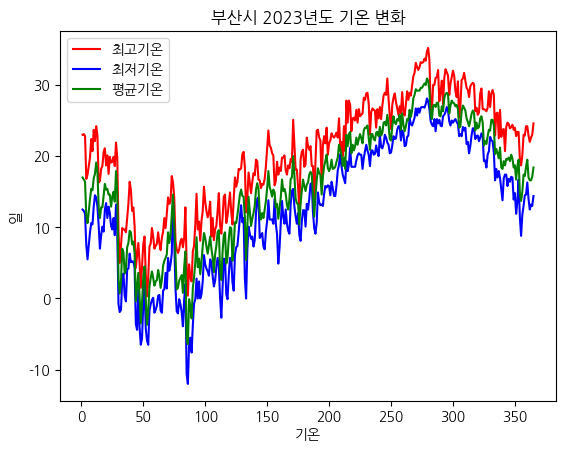

<Figure size 640x480 with 0 Axes>

In [19]:
# 맷플롯립 관련 라이브러리 가져오기
import matplotlib.pyplot as plt

# 글꼴 설정
#plt.rc('font',family='HancomUljuBangudaePetroglyph')
plt.rcParams ['font.family'] = 'NanumGothic'
# 마이너스 기호가 꺠지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

# 그래프의 제목 설정
plt.title('부산시 2023년도 기온 변화')

# 선 그래프 그리기
# x추 과 y축 설정
plt.plot(range(1,len(df)+1), df2['최고기온'], label = '최고기온', c = 'r')
plt.plot(range(1,len(df)+1), df2['최저기온'], label = '최저기온', c = 'b')
plt.plot(range(1,len(df)+1), df2['평균기온'], label = '평균기온', c = 'g')

# x축과 y축 라벨 설정
plt.xlabel('기온')
plt.ylabel('일')

# 범례 표시
plt.legend()

# 그래프 화면에 표시
plt.show()

# 파일로 저장
plt.savefig('2023부산기온.png')

3월 데이터만 추출하기.

일시는 Object 자료형이다.

3월 에디터를 추출 할 수 있도록 "연-월-일"의 날짜형 데이터로 변경하자.

In [21]:
# 일시 데이터를 날짜형으로 변경
df2['일시'] = pd.to_datetime(df2['일시'], format='%Y-%m-%d')

df2['일시']

0     2022-11-01
1     2022-11-02
2     2022-11-03
3     2022-11-04
4     2022-11-05
         ...    
360   2023-10-27
361   2023-10-28
362   2023-10-29
363   2023-10-30
364   2023-10-31
Name: 일시, Length: 365, dtype: datetime64[ns]

In [ ]:
# 일시 열을 인덱스로 지정
# 일시열은 각 행에서 교유하면서 순차로 증가하기 때문에
# 이 열을 인덱스로 지정하면 편리함
df3 = df2.set_index('일시')



,지점,지점명,평균기온,최저기온,최저기온 시각(hhmi),최고기온,최고기온 시각(hhmi)
일시,,,,,,,
2022-11-01,159,부산,17.0,12.5,657.0,23.0,1217
2022-11-02,159,부산,16.7,12.3,554.0,23.1,1258
2022-11-03,159,부산,16.4,11.9,654.0,22.8,1348
2022-11-04,159,부산,11.6,7.5,2357.0,16.8,1519
2022-11-05,159,부산,10.6,5.5,537.0,17.4,1447
